# EECS 3401: Project

## Author: Harsh Parmar & Shubhkumar Patel

**Dataset Source: Suraj, (2023) . _Car Sales Data_ . Kaggle . https://www.kaggle.com/datasets/suraj520/car-sales-data**

**Modified Dataset: _Car Sales Data_ . https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv**

# Car Sales Data

**Attributes for car-sales-data.csv dataset:**

The below attributes are copied from the original dataset.
1. Date: The date of the car sale
2. Salesperson: The name of the salesperson who made the sale
3. Customer Name: The name of the customer who purchased the car
4. Car Make: The make of the car that was purchased
5. Car Model: The model of the car that was purchased
6. Car Year: The year of the car that was purchased
7. Sale Price: The sale price of the car in USD
8. Commission Rate: The commission rate paid to the salesperson on the sale
9. Commission Earned: The amount of commission earned by the salesperson on the sale

## 1 - Look at the big picture & frame the problem.

### Look at the big picture

- Predictions will help the car manufactures to know future sales of cars.

### Frame the problem

- Supervised learning:
- A regression task:
- Batch learning:

## 2 - Load the dataset.

In [1]:
# Import libraries.
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
url = "https://media.githubusercontent.com/media/ParmarHarsh/Project-Group-50/main/car_sales_data.csv"
cars = pd.read_csv(url, sep=',')

# Create a backup copy of the dataset.
cars_backup = cars

### 2.1 - Take a quick look at the data structure.

In [2]:
cars

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85
...,...,...,...,...,...,...,...,...,...
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80


In [3]:
cars.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
cars.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [6]:
cars.shape

(2500000, 9)

### 2.2 - Create a test set.

## 3 - Explore and visualize the data to gain insights.

### 3.1 - Plot a histogram of the data.

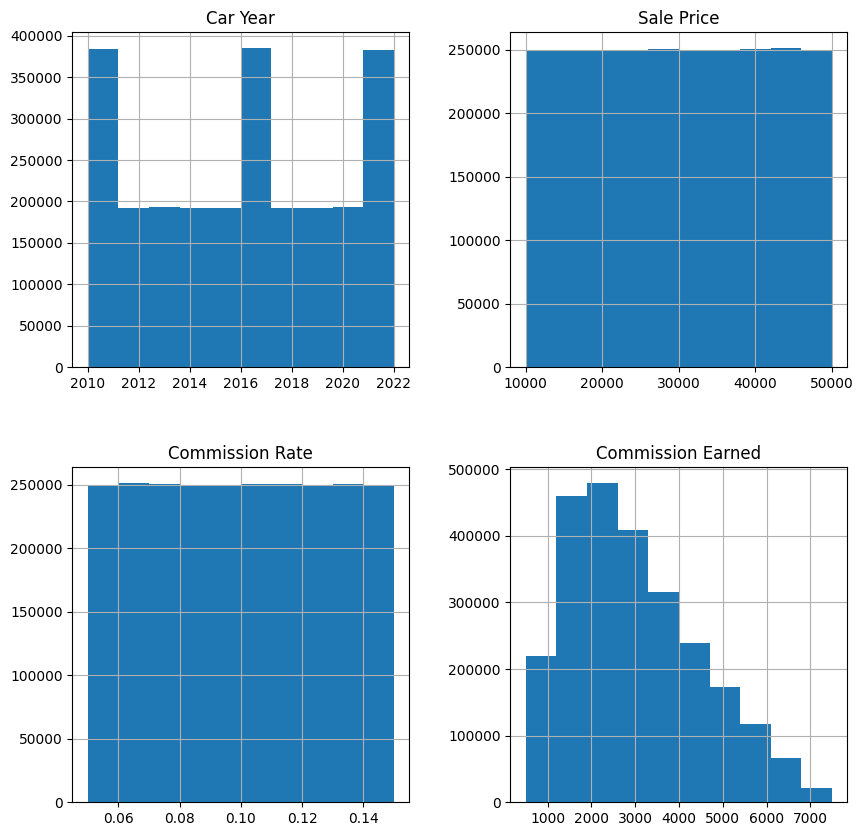

In [10]:
cars.hist(figsize=(10,10))
plt.show()

### 3.2 - Look for correlations between the features.

#### 3.2.1 - Correlation between attributes using sns.pairplot.

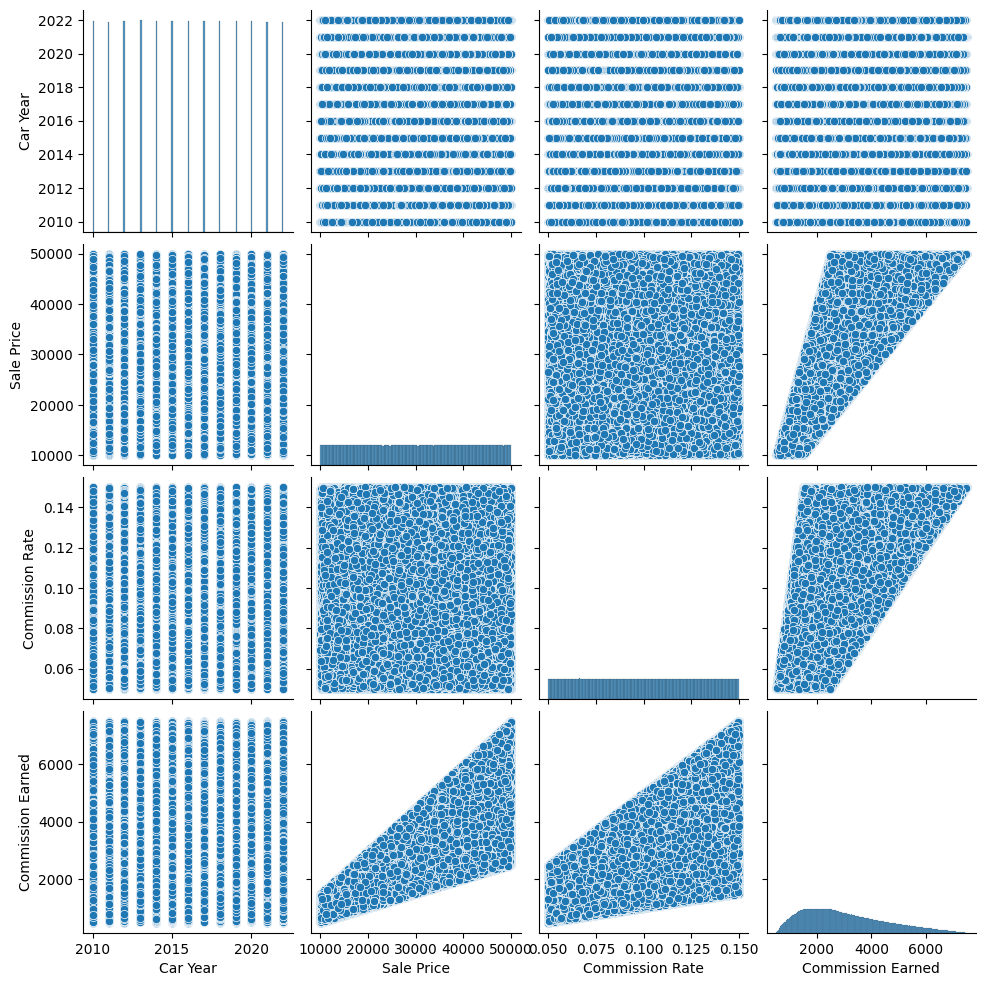

In [14]:
sns.pairplot(cars)

#### 3.2.2 - Correlations using Pearson correlation coefficient.

In [15]:
corr_matrix = cars.corr(numeric_only=True)
corr_matrix

,Car Year,Sale Price,Commission Rate,Commission Earned
Car Year,1.000000,-0.000667,-0.000311,-0.000713
Sale Price,-0.000667,1.000000,0.000474,0.779319
Commission Rate,-0.000311,0.000474,1.000000,0.585176
Commission Earned,-0.000713,0.779319,0.585176,1.000000


#### 3.2.3 - Correlations with regard to our target.

In [16]:
corr_matrix["Sale Price"].sort_values(ascending=False)

Sale Price           1.000000
Commission Earned    0.779319
Commission Rate      0.000474
Car Year            -0.000667
Name: Sale Price, dtype: float64

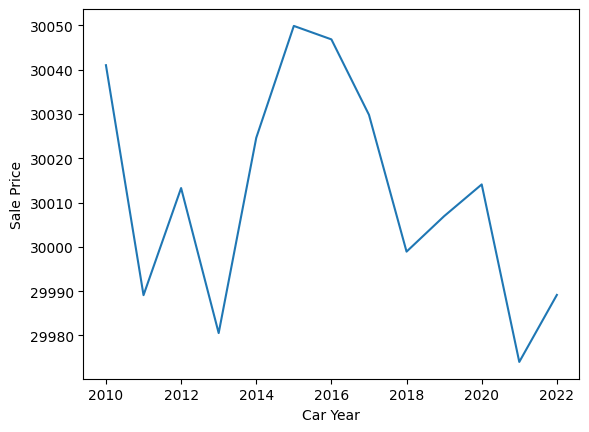

In [18]:
sale_vs_price = sns.lineplot(x="Car Year", y="Sale Price", data=cars, errorbar=None)

### 3.3 - Look at the structure of Car Make and Car Model

In [19]:
cars["Car Make"].value_counts()

Car Make
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: count, dtype: int64

In [20]:
cars["Car Model"].value_counts()

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64